<h1><center style="color:#ff0000; font-family: 'Bold', cursive; font-size:45px;">Netflix Stocks Analysis and Predictions</center></h1>

 > ## <span style="color:red"><b>|</b></span><span style="color:black"> <b>Introduction </b></span><span style="color:red"><b>|</b></span> - `In this notebook we will analyze the Netflix stocks. We will take a look at their stock prices and make predictions. We will analyze their current position on the market, and make inferences on whether it is a safe choice to invest in their stocks. So, without further ado, let's get started!`

# 1 <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Setup </span>

`Let's setup the notebook by loading the data, importing all the necessary modules, and setting up a scrolling table.`

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display, HTML 
print("Setup Complete")

Setup Complete


In [2]:
data = pd.read_csv('/kaggle/input/netflix-datset/netflix.csv')

data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [3]:
def scroll_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
def make_data_table(dataset, title):
    graph = dataset.select_dtypes(include=[np.number])
    info_graph = scroll_table(dataset, 'graph_data_2', title)
    display(HTML(info_graph))
    return make_data_table

make_data_table(data, 'Data')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900
5,2010-01-11,7.660000,7.704286,7.528571,7.604286,7.604286,6783700
6,2010-01-12,7.528571,7.582857,7.451429,7.481429,7.481429,6330100
7,2010-01-13,7.612857,7.754286,7.558571,7.708571,7.708571,14422100
8,2010-01-14,7.518571,7.575714,7.270000,7.284286,7.284286,17685500
9,2010-01-15,7.245714,7.407143,7.232857,7.278571,7.278571,13031200


<function __main__.make_data_table(dataset, title)>

# 2 <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> EDA </span>

`Let's start our analysis of the data with a simple analysis of the data details, such as shape and null values, as well as summary statistics.`

> ### <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Simple Analysis </span>

In [5]:
print("Simple Analysis")
print("---------------")
print("Shape")
print(data.shape)
print("---------------")
print("Columns")
print(data.columns)
print("---------------")
print("Types of Columns")
print(data.dtypes)

Simple Analysis
---------------
Shape
(3563, 7)
---------------
Columns
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
---------------
Types of Columns
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [6]:
null_val = data.isnull().sum()
html_null_val = scroll_table(null_val.to_frame(), 'null_val', 'Null values in Data')
display(HTML(html_null_val))

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [7]:
sum_stats = data.select_dtypes(include = [np.number])
summary = sum_stats.describe().T
sum_html = scroll_table(summary, 'sum_stats', 'Summary Statistics for Netflix Data')

display(HTML(sum_html))

,count,mean,std,min,25%,50%,75%,max
Open,3563.0,2.064623e+02,1.832499e+02,6.960000e+00,3.816000e+01,1.403000e+02,3.552500e+02,6.923500e+02
High,3563.0,2.096212e+02,1.857709e+02,7.178571e+00,3.864429e+01,1.412400e+02,3.613500e+02,7.009900e+02
Low,3563.0,2.032117e+02,1.805809e+02,6.931429e+00,3.757929e+01,1.390000e+02,3.494650e+02,6.860900e+02
Close,3563.0,2.064952e+02,1.831974e+02,7.018571e+00,3.815500e+01,1.397600e+02,3.556950e+02,6.916900e+02
Adj Close,3563.0,2.064952e+02,1.831974e+02,7.018571e+00,3.815500e+01,1.397600e+02,3.556950e+02,6.916900e+02
Volume,3563.0,1.741808e+07,1.999678e+07,1.144000e+06,5.804300e+06,1.094040e+07,2.172250e+07,3.155418e+08


> ### <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Exploratory Analysis </span>

`Now, let's move on to the full analysis of the stock prices.`

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Open'], mode='lines+markers', name='Opening Prices', marker=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines+markers', name='Closing Prices', marker=dict(color='tomato')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['High'], mode='lines+markers', name='High Prices', marker=dict(color='lightblue')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Low'], mode='lines+markers', name='Low Prices', marker=dict(color='yellow')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['Adj Close'], mode='lines+markers', name='Adj Close', marker=dict(color='skyblue')))
fig.update_layout(title='OHLC Values of Netflix Stock', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

`The graph shows how close to each other are the stock values. If you hide all the other lines and leave only High and Low shown, you will see that the difference between the open and high values of a single day is very small. This signals stability on the stock market, making netflix stocks a choice to consider for investment. We will return to this later on, for now let's continue our analysis.`

In [9]:
hovertext=[]
for i in range(len(data['Open'])):
    hovertext.append('Open: '+str(data['Open'][i])+'<br>Close: '+str(data['Close'][i]))
    
fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'],
                    text=hovertext,
                    hoverinfo='text',
                    increasing_line_color= 'cyan', 
                    decreasing_line_color= 'gray'))

fig.update_layout(title='OHLC Chart of Netflix Stock')
fig.show()

`The OHLC chart shows the same thing as did the line plot above, the differences between the high and low values are very small. At October 2021 there was a significant growth in the stock values. This is because the company suddenly gained over 23 million subscribers by the end of that year, making the cost of their stocks to go up. Let's continue our analysis.`

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Volume'], mode = "lines+markers", name = "Volume", marker = dict(color = 'red')))
fig.update_layout(title='Volume of Netflix Stock', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

`This chart shows the trading volumes of the stocks. As you can see there is a sudden rise in the volume on October 2011. This is because in October 2011, Netflix raised its subsription cost by 20-60%. Due to this sudden price hike, Netflix lost over 800,000 subscribers, which is about 3% of their total at that time of 23.8 million, most of which decided to pay the higher price, increasing their overall profit. Shareholders in the company quickly understood that if they started to buy more stocks, they will recieve more profit due to the fact that more people went for the higher price. This increased the stock trading volume very rapidly. Let's move on.`

In [11]:
fig = px.histogram(data, x='Open', nbins=20, title='Distribution of Open Values', marginal='box', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()
fig = px.histogram(data, x='High', nbins=20, title='Distribution of High Values', marginal='box', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()
fig = px.histogram(data, x='Low', nbins=20, title='Distribution of Low Values', marginal='box', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()
fig = px.histogram(data, x='Close', nbins=20, title='Distribution of Close Values', marginal='box', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()
fig = px.histogram(data, x='Adj Close', nbins=20, title='Distribution of Adjusted Close Values', marginal='box', color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

`If you parallely examine the high and low values, you will once again see very little difference between the stock values. This signals stability and a good ground for investment.`

# 3 <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Predictions </span>

`Finally, let's move onto predicting the stock prices. For this purpose we will use the module yfinance and other modules.`

> ### <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Setup </span>

`Let's setup the notebook by importing all the necessary modules and insatlling yfinance.`

In [12]:
!pip install -q yfinance

In [13]:
from pandas_datareader.data import DataReader
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler

yf.pdr_override()

# For time stamps
from datetime import datetime
print("Setup Complete")

2024-04-23 14:32:10.365293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 14:32:10.365428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 14:32:10.478375: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Setup Complete


> ### <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Preparing Data </span>

`Let's prepare the data for our predictions.`

In [14]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3385

In [15]:
# Let's scale the dataset to the needed size
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.07630928e-04],
       [4.96588782e-04],
       [8.74247452e-04],
       ...,
       [8.68520848e-01],
       [8.60940566e-01],
       [8.70346541e-01]])

In [16]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00090763, 0.00049659, 0.00087425, 0.00068229, 0.00087007,
       0.00085547, 0.00067603, 0.00100778, 0.00038809, 0.00037974,
       0.00043191, 0.00044025, 0.00042982, 0.00036723, 0.        ,
       0.00017109, 0.00038392, 0.00290233, 0.0027375 , 0.00248294,
       0.00265404, 0.0026749 , 0.00233897, 0.0024433 , 0.00245582,
       0.00271246, 0.00257892, 0.0029691 , 0.00293154, 0.00328207,
       0.00320905, 0.0035408 , 0.00365556, 0.00336762, 0.00317566,
       0.00324661, 0.00343856, 0.00353037, 0.00429194, 0.00414172,
       0.00384335, 0.00393933, 0.00386421, 0.00407912, 0.00434202,
       0.00462161, 0.00460283, 0.00435037, 0.00427108, 0.00448599,
       0.0045465 , 0.00446721, 0.00444843, 0.00495754, 0.00497215,
       0.00484904, 0.00509316, 0.00525174, 0.00516828, 0.00541031])]
[0.00513489315228269]

[array([0.00090763, 0.00049659, 0.00087425, 0.00068229, 0.00087007,
       0.00085547, 0.00067603, 0.00100778, 0.00038809, 0.00037974,
       0.00043191, 0.00044025, 0.00

> ### <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Model Training </span>

`Now let's train our model on the data and make the predictions.`

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3325/3325 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.0033


In [18]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


15.352767278728939

# 4 <span style="color:#7b2cbf"></span><span style="color:red ">||</span><span style="color:black"> Conclusion </span>

`Finally, let's make a graph and take a look at the predictions.`

/tmp/ipykernel_23/1360903539.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



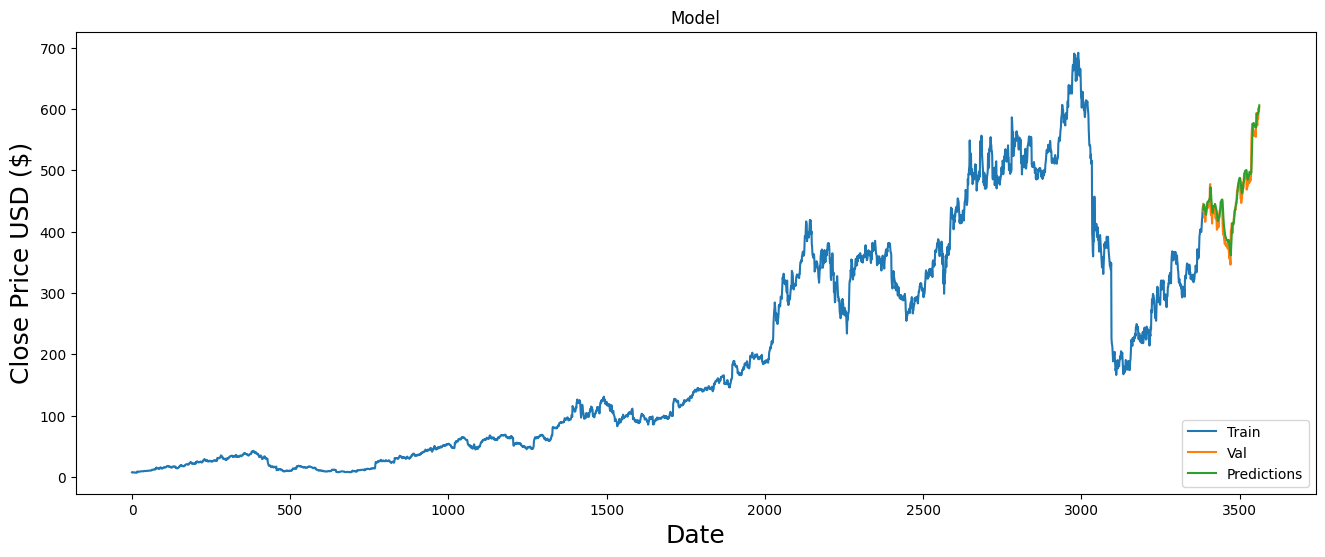

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show();

`As you can see, based on the predictions the stock prices of Netflix will rise. Based on the past values of the stocks, these predictions can be indeed counted as accurate. So, based on the past stock prices and trading volumes, and the predicted prices, we can infer that Netflix's stock are stable and have very good ground for investing. They can bring good profit to the investor and shareholder. So, the stocks are perfect for buying and investing.`

 > ## <span style="color:red"><b>|</b></span><span style="color:black"> <b>Credits </b></span><span style="color:red"><b>|</b></span> - `Thanks to Muhammad Ibrahim Quasmi for sharing this awesome dataset. Also, thanks to Fares Sayah for his tutorial on how to predict stock prices.Thanks for viewing this notebook! Please upvote and feel free to fork. Thank you. God bless you.`
 